In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
import re
import numpy as np

POINTS_PATH = 'points.txt'

with open(POINTS_PATH, 'r') as f:
    content = re.split(r'\[|\]', f.read())
pairs = zip(content[1::2], content[2::2])

X = []
y = []

for point, data in pairs:
    point = np.array([np.float(p) for p in point.split()])

    parsed_data = re.split(r'^\tFunction value = |\nAttempts left = ', data)
    if (data != '\tUNDIFINED\n'):
        result, attempts = [np.float(number)
                                for number in parsed_data if number]
    else:
        if point[6] == 0:
            result = 1000000
        if point[9] == 0:
            result = -1000000
    
    X.append(point)
    y.append(result)

X = np.array(X)
y = np.array(y)

In [3]:
X_boundary, y_boundary = X[0:11], y[0:11]

In [4]:
X_boundary

array([[ 0., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10.,  0., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10.,  0., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10.,  0., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10.,  0., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10.,  0., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10.,  0., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10.,  0., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10.,  0., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]])

In [5]:
X_median, y_median = X[-11:], y[-11:]

In [6]:
X_median

array([[2., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 2., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 2., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 2., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 2., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 2., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 2., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 2., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 2., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 2.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]])

In [7]:
X_random, y_random = X[11:-11], y[11:-11]

In [8]:
model = RandomForestRegressor()

In [9]:
model.fit(X_boundary, y_boundary)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [10]:
import matplotlib.pyplot as plt

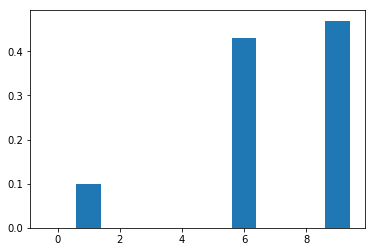

In [11]:
plt.bar(np.arange(len(model.feature_importances_)),
            model.feature_importances_)
plt.show()

In [12]:
model.fit(X_median, y_median)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

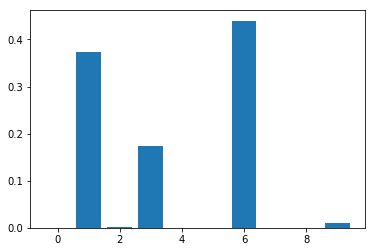

In [13]:
plt.bar(np.arange(len(model.feature_importances_)),
            model.feature_importances_)
plt.show()

In [14]:
model.fit(X_random, y_random)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

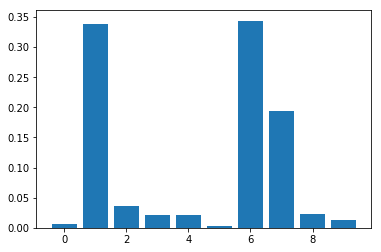

In [15]:
plt.bar(np.arange(len(model.feature_importances_)),
            model.feature_importances_)
plt.show()

In [16]:
#mask = [True, False, True, True, True, True, False, True, True, True] #1 and 6 omitted
#mask = [True, False, True, True, True, True, True, True, True, True] #1 omitted
#mask = [True, True, True, True, True, True, False, True, True, True] #6 omitted
mask = [True, False, True, True, True, True, False, True, True, False] #1, 6, 9 omitted (for all of the above 9 is still important)


In [17]:
model.fit(X_boundary[:, mask], y_boundary)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
kept_features = np.where(mask)[0]

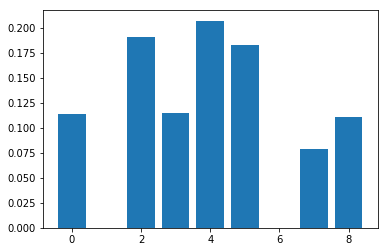

In [19]:
plt.bar(kept_features,
            model.feature_importances_)
plt.show()

In [20]:
model.fit(X_median[:, mask], y_median)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

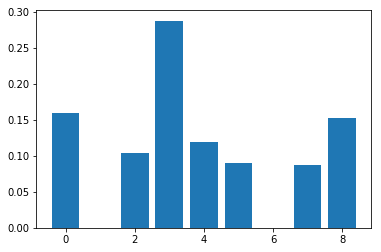

In [21]:
plt.bar(kept_features,
            model.feature_importances_)
plt.show()

In [22]:
model.fit(X_random[:, mask], y_random)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

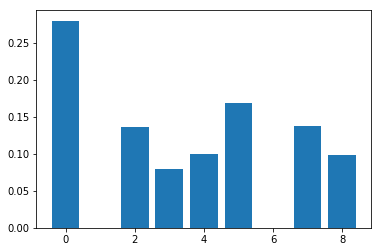

In [23]:
plt.bar(kept_features,
            model.feature_importances_)
plt.show()

In [24]:
X_sorted, y_sorted = zip(*sorted(zip(X[:,1], y)))

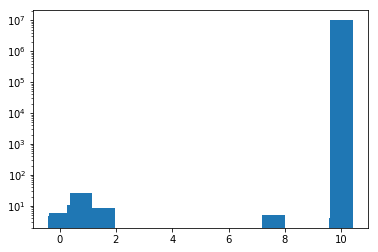

In [25]:
plt.bar(X_sorted, y_sorted)
plt.yscale('log')
plt.show()

In [26]:
X_sorted, y_sorted = zip(*sorted(zip(X[:,6], y)))

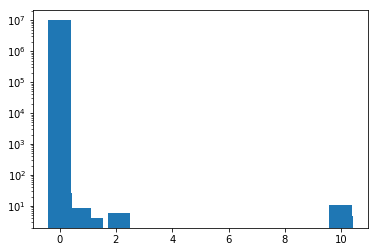

In [27]:
plt.bar(X_sorted, y_sorted)
plt.yscale('log')
plt.show()

In [28]:
X_sorted, y_sorted = zip(*sorted(zip(X[:,9], y)))

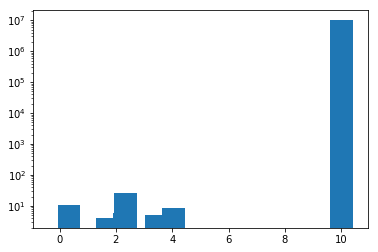

In [29]:
plt.bar(X_sorted, y_sorted)
plt.yscale('log')
plt.show()

In [30]:
sorted(zip(X[:,6], y))

[(0.0, 10000000.0),
 (0.04920567, 25.4506893322),
 (0.05366258, 5.30236651632),
 (0.70557902, 8.68407831764),
 (1.01928422, -7.11619919917),
 (1.12865355, 4.11302400233),
 (1.2488838, -12.7762884138),
 (1.52372281, -3.91430303944),
 (2.0, -1.14823804616),
 (2.11247068, 5.73755146414),
 (2.40471159, -9.53066768301),
 (2.91158458, -24.3390885509),
 (3.22353914, -12.1031205743),
 (3.89700353, -2.90389930592),
 (3.9536382, -7.68927332894),
 (3.97306015, -29.192743441),
 (4.10983811, -3.11533115169),
 (4.24914962, -3.98514356877),
 (4.29164217, -2.11047403424),
 (4.51229691, -13.5054946071),
 (5.0, -22.6576949238),
 (5.0, -17.6091044425),
 (5.0, -17.3293768762),
 (5.0, -17.0969213442),
 (5.0, -16.9053564096),
 (5.0, -16.7293768762),
 (5.0, -16.7293768762),
 (5.0, -16.7293768762),
 (5.0, -15.2293768762),
 (5.0, -1.72937687625),
 (5.20482661, -14.9490332975),
 (5.45684679, -24.6993298062),
 (5.98865986, -29.7796491033),
 (6.17495474, -10.0811128943),
 (6.57620044, -44.506590892),
 (6.60894007

In [31]:
sorted(zip(X[:,9], y))

[(0.0, -10000000.0),
 (0.29027576, -29.192743441),
 (0.32974314, 10.66110674),
 (0.564395432, -3.11533115169),
 (0.74609523, -63.4270263644),
 (0.75838905, -33.079014374),
 (1.06355027, -24.3390885509),
 (1.2686549, -1.37647634899),
 (1.61063918, -14.5702032956),
 (1.69230337, 4.11302400233),
 (1.73436973, -24.6993298062),
 (2.0, -15.2293768762),
 (2.28398984, 5.73755146414),
 (2.3380324, 25.4506893322),
 (2.47696785, -9.53066768301),
 (3.17099939, -3.91430303944),
 (3.3110876, -12.1031205743),
 (3.37307081, -70.5222395691),
 (3.42061609, 5.30236651632),
 (3.66050022, -29.7796491033),
 (3.77105948, -58.3712404998),
 (3.79571619, -10.0811128943),
 (3.99476947, -14.9101454713),
 (4.05258056, 8.68407831764),
 (4.37409752, -13.5054946071),
 (4.61422223, -73.1224608194),
 (4.8536459, -3.98514356877),
 (5.0, -22.6576949238),
 (5.0, -17.6091044425),
 (5.0, -17.3293768762),
 (5.0, -17.0969213442),
 (5.0, -16.9053564096),
 (5.0, -16.7293768762),
 (5.0, -16.7293768762),
 (5.0, -16.7293768762),
 

0 по фиче 6 +
0 по фиче 9 -

при 6 важны 1 и иногда 9
при 1 важны 6 и иногда 9

In [32]:
X_fit, y_fit = X[0:-11], y[0:-11]

In [33]:
model.fit(X_fit[:,mask], y_fit).predict(X_fit[:,mask]).astype(int)

array([-666739, -783367,  -83400, -583395, -783398,  249921, -783367,
       -200062, -633404, -783367, -783367,     -32,     -10,     -52,
           -12,     -12,     -68,     -22,     -22,     -13,       0,
           -24,      -6,      -4,     -20,     -62,     -19,      -7,
           -26,     -39,     -28,      10,     -54,     -17,     -39,
           -18,     -28,     -25,       3,      -1,     -27,     -59,
           -25,     -10,     -19,     -25,     -12,      -8,      -5,
            -7,     -40,     -35])

In [34]:
from pickle import dump
with open('rf_inf.pkl', 'wb') as f:
    dump(model, f) 

In [35]:
import pandas as pd
X_test = pd.read_csv('data.txt', sep=' ', header=None)

In [36]:
X_test['Expected'] = model.predict(X_test.values[:, mask])

In [37]:
X_test['Id'] = X_test.index + 1

In [38]:
X_test[['Id', 'Expected']].to_csv('submit_rf_inf.csv', index=False)